In [459]:
from scipy.stats import binom
import seaborn as sb
from scipy.stats import skew
import numpy as np
import pandas as pd
import pylab as p
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

array([10, 16, 15, 18, 15, 18, 19, 11, 17, 20])

/Users/Admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

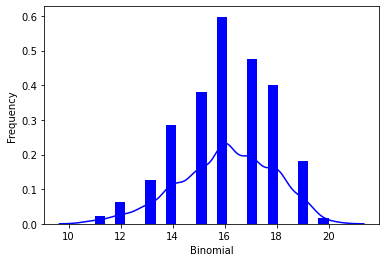

In [460]:
binom.rvs(size=10,n=20,p=0.8)

data_binom = binom.rvs(n=20,p=0.8,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

### Skewness = (3 (mean - median)) / standard deviation 


Skewness for data :  1.1108237139164436


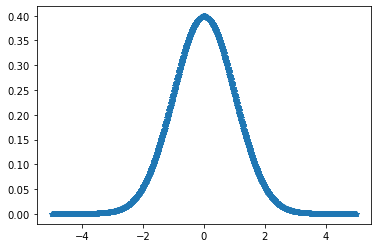

In [461]:
# Graph using numpy.linspace()
# finding Skewness

x1 = np.linspace( -5, 5, 1000 )
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2 )

p.plot(x1, y1, '*')

print( '\nSkewness for data : ', skew(y1))


In [462]:
x = [1,2,3,4,5]
y = [5,9,14,13,16]
x
y

[1, 2, 3, 4, 5]

[5, 9, 14, 13, 16]

In [463]:
covariance_s = np.cov(x, y)[0][1]
covariance_s

6.5

In [464]:
z = np.corrcoef(x, y)[0,1]
z

0.9357604759733028

### SQL ###

In [465]:
# !pip install -U pandasql

In [466]:
from pandasql import sqldf
import pandas as pd
from sklearn import datasets

In [467]:
A = {1, 2, 3, 4}
B = {5, 6, 7, 8}

AXB = {(1,5), (1,6), (1,7), (1,8),
         (2,5), (2,6), (2,7), (2,8),
         (3,5), (3,6), (3,7), (3,8),
         (4,5), (4,6), (4,7), (4,8)}

In [468]:
frame = pd.DataFrame(
        {"col1": ["A", "B", np.NaN, "C", "D"], "col2": ["F", np.NaN, "G", "H", "I"]}
        )

In [469]:
df_feature = datasets.load_iris(as_frame = True)['data']
df_target = datasets.load_iris(as_frame = True)['target']
print (type(df_feature))
print (type(df_target))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [470]:
q = "SELECT * FROM df_target LIMIT 3"
sqldf(q, globals())

,target
0,0
1,0
2,0


In [471]:
frame[frame["col2"].isna()]

,col1,col2
1,B,NaN


In [472]:
frame[frame["col1"].notna()]

,col1,col2
0,A,F
1,B,NaN
3,C,H
4,D,I


In [473]:
tips.groupby('sex').size()

sex
Female     87
Male      156
dtype: int64

In [474]:
tips.groupby("sex").count()

,total_bill,tip,smoker,day,time,size,date1,date2,date2_month,date1_next,months_between,date1_year
sex,,,,,,,,,,,,
Female,87,87,87,87,87,87,87,87,87,87,87,87
Male,156,156,156,156,156,156,156,156,156,156,156,156


In [475]:
tips.groupby("sex")["total_bill"].count()

sex
Female     87
Male      156
Name: total_bill, dtype: int64

In [476]:
df1 = pd.DataFrame({"key": ["A", "B", "C", "D"], "value": np.random.randn(4)})
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value": np.random.randn(4)})

In [477]:
pd.merge(df1, df2, on="key")

,key,value_x,value_y
0,B,0.769009,-1.346420
1,D,0.431591,-0.826263
2,D,0.431591,-0.276999


In [478]:
indexed_df2 = df2.set_index("key")
indexed_df2

,value
key,
B,-1.346420
D,-0.826263
D,-0.276999
E,1.303027


In [479]:
pd.merge(df1, df2, on="key", how="left")

,key,value_x,value_y
0,A,0.103792,NaN
1,B,0.769009,-1.346420
2,C,0.534191,NaN
3,D,0.431591,-0.826263
4,D,0.431591,-0.276999


In [480]:
pd.merge(df1, df2, on="key", how="right")

,key,value_x,value_y
0,B,0.769009,-1.346420
1,D,0.431591,-0.826263
2,D,0.431591,-0.276999
3,E,NaN,1.303027


SELECT city, rank
FROM df1
UNION ALL
SELECT city, rank
FROM df2;

In [481]:
pd.concat([df1, df2])

,key,value
0,A,0.103792
1,B,0.769009
2,C,0.534191
3,D,0.431591
0,B,-1.346420
1,D,-0.826263
2,D,-0.276999
3,E,1.303027


SELECT *
FROM df1
FULL OUTER JOIN df2
  ON df1.key = df2.key;

In [482]:
pd.merge(df1, df2, on="key", how="outer")

,key,value_x,value_y
0,A,0.103792,NaN
1,B,0.769009,-1.346420
2,C,0.534191,NaN
3,D,0.431591,-0.826263
4,D,0.431591,-0.276999
5,E,NaN,1.303027


In [483]:
tips = pd.read_csv('data/tips.csv')

In [484]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [485]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"])
tips[(tips["time"] == "Dinner") & (tips["tip"] > 5.00)]
tips[tips["time"] == "Dinner"]
tips[(tips["size"] >= 5) | (tips["total_bill"] > 45)]
tips[(tips["time"] == "Dinner") & (tips["tip"] > 5.00)]

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
125,29.80,4.20,Female,No,Thur,Lunch,6
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
185,20.69,5.00,Male,No,Sun,Dinner,5


,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2


SELECT
  AVG(total_bill) 
FROM 
  tips;

In [486]:
tips['tip'].mean()

2.9982786885245902

In [487]:
tips.sort_values("day")

,total_bill,tip,sex,smoker,day,time,size
96,27.28,4.00,Male,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
...,...,...,...,...,...,...,...
132,11.17,1.50,Female,No,Thur,Lunch,2
131,20.27,2.83,Female,No,Thur,Lunch,2
130,19.08,1.50,Male,No,Thur,Lunch,2
128,11.38,2.00,Female,No,Thur,Lunch,2


SELECT *, tip/total_bill as tip_rate
FROM tips;

In [488]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"])

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


SELECT *
FROM tips
WHERE time = 'Dinner';

In [489]:
tips[tips['time'] == 'Dinner']

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [490]:
tips['time'] == 'Dinner' 

0      True
1      True
2      True
3      True
4      True
       ... 
239    True
240    True
241    True
242    True
243    True
Name: time, Length: 244, dtype: bool

SELECT *
FROM tips
WHERE time = 'Dinner' AND tip > 5.00;

In [491]:
tips[(tips["time"] == "Dinner") & (tips["tip"] > 5.00)]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2


SELECT * FROM tips
ORDER BY tip DESC
LIMIT 10 OFFSET 5;

In [492]:
tips.nlargest(10 + 5, columns="tip").tail(10)

,total_bill,tip,sex,smoker,day,time,size
183,23.17,6.50,Male,Yes,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
47,32.40,6.00,Male,No,Sun,Dinner,4
239,29.03,5.92,Male,No,Sat,Dinner,3
88,24.71,5.85,Male,No,Thur,Lunch,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4


In [525]:
tips.nlargest(10 + 5, columns="tip").head(10)

,total_bill,tip,sex,smoker,day,time,size,date1,date2,date2_month,date1_next,months_between,date1_year
212,48.33,9.00,Male,No,Sat,Dinner,4,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
23,39.42,7.58,Male,No,Sat,Dinner,4,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
59,48.27,6.73,Male,No,Sat,Dinner,4,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
141,34.30,6.70,Male,No,Thur,Lunch,6,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
214,28.17,6.50,Female,Yes,Sat,Dinner,3,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
183,23.17,6.50,Male,Yes,Sun,Dinner,4,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
47,32.40,6.00,Male,No,Sun,Dinner,4,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
239,29.03,5.92,Male,No,Sat,Dinner,3,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
88,24.71,5.85,Male,No,Thur,Lunch,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
181,23.33,5.65,Male,Yes,Sun,Dinner,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013


SELECT
  AVG(total_bill), 
  AVG(tip) 
FROM 
  tips;

In [494]:
tips.agg({'total_bill': ['mean'], 'tip': ['mean']})

,total_bill,tip
mean,19.785943,2.998279


SELECT
  time, 
  AVG(total_bill), 
  AVG(tip) 
FROM 
  tips
GROUP BY
  time;

In [495]:
tips.groupby('time').agg({'total_bill': ['mean'], 'tip': ['mean']})

,total_bill,tip
,mean,mean
time,,
Dinner,20.797159,3.102670
Lunch,17.168676,2.728088


In [496]:
tips.head()
tips.groupby(['time', 'day']).agg({'total_bill': ['mean'], 'tip': ['mean']})

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


total_bill       tip
                  mean      mean
time   day                      
Dinner Fri   19.663333  2.940000
       Sat   20.441379  2.993103
       Sun   21.410000  3.255132
       Thur  18.780000  3.000000
Lunch  Fri   12.845714  2.382857
       Thur  17.664754  2.767705

SELECT 
  time, 
  day, 
  AVG(tip) AS average_tip, 
  AVG(total_bill) AS average_total_bill 
FROM 
  tips
GROUP BY
  time,
  day;

In [497]:
tips.groupby(['time', 'day']).agg(average_tip=('tip', 'mean'), average_total_bill=('total_bill', 'mean'))

average_tip  average_total_bill
time   day                                  
Dinner Fri      2.940000           19.663333
       Sat      2.993103           20.441379
       Sun      3.255132           21.410000
       Thur     3.000000           18.780000
Lunch  Fri      2.382857           12.845714
       Thur     2.767705           17.664754

UPDATE tips
SET tip = tip*2
WHERE tip < 2;

In [498]:
tips.loc[tips["tip"] < 2, "tip"] *= 2
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


DELETE FROM tips
WHERE tip > 9;

In [499]:
tips = tips.loc[tips["tip"] <= 9]
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,3.50,Male,No,Sat,Dinner,2


In [500]:
tips["date1"] = pd.Timestamp("2013-01-15")
tips["date2"] = pd.Timestamp("2013-01-15")

In [501]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,date1,date2
0,16.99,2.02,Female,No,Sun,Dinner,2,2013-01-15,2013-01-15
1,10.34,3.32,Male,No,Sun,Dinner,3,2013-01-15,2013-01-15
2,21.01,3.50,Male,No,Sun,Dinner,3,2013-01-15,2013-01-15
3,23.68,3.31,Male,No,Sun,Dinner,2,2013-01-15,2013-01-15
4,24.59,3.61,Female,No,Sun,Dinner,4,2013-01-15,2013-01-15


In [502]:
tips["date1"] = pd.Timestamp("2013-01-15")
tips["date1"] = pd.Timestamp("2013-01-15")
tips["date2_month"] = tips["date2"].dt.month

In [503]:
tips["date1_next"] = tips["date1"] + pd.offsets.MonthBegin()

In [527]:
tips["months_between"] = tips["date2"].dt.to_period("M") - tips["date1"].dt.to_period("M")
tips['date1_year'] = tips["date1"].dt.year

In [505]:
tips

,total_bill,tip,sex,smoker,day,time,size,date1,date2,date2_month,date1_next,months_between,date1_year
0,16.99,2.02,Female,No,Sun,Dinner,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
1,10.34,3.32,Male,No,Sun,Dinner,3,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
2,21.01,3.50,Male,No,Sun,Dinner,3,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
3,23.68,3.31,Male,No,Sun,Dinner,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
4,24.59,3.61,Female,No,Sun,Dinner,4,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
242,17.82,3.50,Male,No,Sat,Dinner,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013


In [506]:
tips[
     ["date1", "date2", "date1_year", "date2_month", "date1_next", "months_between"]
    ]

,date1,date2,date1_year,date2_month,date1_next,months_between
0,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>
1,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>
2,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>
3,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>
4,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>
...,...,...,...,...,...,...
239,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>
240,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>
241,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>
242,2013-01-15,2013-01-15,2013,1,2013-02-01,<0 * MonthEnds>


In [507]:
from datetime import datetime, timedelta, timezone
from dateutil import tz

In [508]:
dt_1 = datetime.strptime("2016-04-15T08:27:18-0500", "%Y-%m-%dT%H:%M:%S%z")
JST = timezone(timedelta(hours=+9))
dt_1

datetime.datetime(2016, 4, 15, 8, 27, 18, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400)))

In [509]:
dt_2 = datetime(2015, 1, 1, 12, 0, 0, tzinfo=JST)
dt_2.tzname()

'UTC+09:00'

In [510]:
dt = datetime(2015, 1, 1, 12, 0, 0, tzinfo=timezone(timedelta(hours=9), 'JST'))

In [511]:
local = tz.gettz()
PT = tz.gettz('US/Pacific')

In [512]:
then = datetime(2023, 1, 8)

In [513]:
then

datetime.datetime(2023, 1, 8, 0, 0)

In [514]:
now = datetime.now()

In [515]:
delta = then - now
delta

datetime.timedelta(days=-2, seconds=11059, microseconds=115494)

In [516]:
delta.seconds

11059

In [517]:
delta.days

-2

In [518]:
tips_total_bill_2 = tips.rename(columns={"total_bill": "total_bill_2"})

In [519]:
tips = tips.sort_values(["sex", "total_bill"])
tips2 = tips.sort_values(["sex", "size", "total_bill"])

In [520]:
tips

,total_bill,tip,sex,smoker,day,time,size,date1,date2,date2_month,date1_next,months_between,date1_year
67,3.07,2.00,Female,Yes,Sat,Dinner,1,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
92,5.75,2.00,Female,Yes,Fri,Dinner,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
111,7.25,2.00,Female,No,Sat,Dinner,1,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
145,8.35,3.00,Female,No,Thur,Lunch,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
135,8.51,2.50,Female,No,Thur,Lunch,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,41.19,5.00,Male,No,Thur,Lunch,5,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
156,48.17,5.00,Male,No,Sun,Dinner,6,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
59,48.27,6.73,Male,No,Sat,Dinner,4,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013


In [521]:
tips2

,total_bill,tip,sex,smoker,day,time,size,date1,date2,date2_month,date1_next,months_between,date1_year
67,3.07,2.00,Female,Yes,Sat,Dinner,1,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
111,7.25,2.00,Female,No,Sat,Dinner,1,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
82,10.07,3.66,Female,No,Thur,Lunch,1,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
92,5.75,2.00,Female,Yes,Fri,Dinner,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
145,8.35,3.00,Female,No,Thur,Lunch,2,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,28.15,3.00,Male,Yes,Sat,Dinner,5,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
142,41.19,5.00,Male,No,Thur,Lunch,5,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013
141,34.30,6.70,Male,No,Thur,Lunch,6,2013-01-15,2013-01-15,1,2013-02-01,<0 * MonthEnds>,2013


In [522]:
tips["time"].str.len()

67     6
92     6
111    6
145    5
135    5
      ..
142    5
182    6
156    6
59     6
212    6
Name: time, Length: 243, dtype: int64

In [523]:
tips['sex'].str.find('male')

67     2
92     2
111    2
145    2
135    2
      ..
142   -1
182   -1
156   -1
59    -1
212   -1
Name: sex, Length: 243, dtype: int64